import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = tf.keras.layers.Input(shape=(5,))
hidden = tf.keras.layers.Dense(2000, activation="relu", name="hidden", trainable = False)
outputs = tf.keras.layers.Dense(1)(hidden(inputs))
model = tf.keras.models.Model(inputs = inputs, outputs = outputs)


model.summary()

model.compile(optimizer='sgd', loss = 'mse')
model.metrics_names

In [1]:
import numpy as np
np.random.seed(1)
x1, x2 = np.random.normal(size = (200, 5)), np.random.normal(size = (20, 5))
beta, delta = 10 * np.array([1, 1, 0, 0, 0]).reshape((-1,1)),\
     np.array([0, 0, 1, 1, 1]).reshape((-1,1))
y1, y2 = x1 @ (beta + delta) + 0.1 * np.random.normal(size=(200, 1)), x2 @ (beta - delta) + 0.1 * np.random.normal(size = (20, 1))
x, y = np.vstack((x1, x2)), np.vstack((y1, y2))

In [2]:
x_test = np.random.normal(size = (1000, 5))
y_test = x_test @ (beta + delta) + 0.1 * np.random.normal(size = (1000, 1))

model.fit(x, y, epochs = 200)

model.evaluate(x_test, y_test)

In [3]:
from scipy.linalg import inv
w = np.random.normal(size = (5, 2000))#/np.sqrt(2000)

In [4]:
def hidden_layer(x, w):
    z = x @ w
    z[z<0]=0
    return z

In [5]:
z = hidden_layer(x, w)

u, s, v = np.linalg.svd(z)

def predict(x, weights):
    w, beta = weights
    z = hidden_layer(x, w)
    return z @ beta

def evaluate(data, weights, sample_weight = []):
    x, y = data
    n, _ = x.shape
    if sample_weight == []:
        sample_weight = np.array([1]*n)
    sample_weight = sample_weight/np.sum(sample_weight)
    y_hat = predict(x, weights)
    error = (y - y_hat).reshape((-1,))
    return np.sum(error ** 2  * sample_weight)

y_hat = predict(x, [w, beta])

(z @ z.T) @ inv(z @ z.T)

z @ z.T

z.shape

In [6]:
beta = np.linalg.lstsq(z, y)[0]

In [7]:
np.mean((z @ beta - y)**2)

6.525657039381172e-28

In [8]:
def hidden_layer(x, w):
    z = x @ w
    z[z<0]=0
    return z

def predict(x, weights):
    w, beta = weights
    z = hidden_layer(x, w)
    return z @ beta

def evaluate(data, weights, sample_weight = []):
    x, y = data
    n, _ = x.shape
    if sample_weight == []:
        sample_weight = np.array([1]*n)
    sample_weight = sample_weight/np.sum(sample_weight)
    y_hat = predict(x, weights)
    error = (y - y_hat).reshape((-1,))
    return np.sum(error ** 2  * sample_weight)

In [9]:
data = x, y
weights = w, beta
evaluate(data, weights)

6.525657039381172e-28

In [54]:
gammas = np.logspace(0.1, 1.)
pi     = 0.9
n      = 200
sims   = 10
SNR = 1
biases, predErrs = list(), list()

In [55]:
for gamma in gammas:
  d = np.rint(gamma * n).astype(int)

  bias, predErr = 0., 0.
  for i1 in range(sims):
    beta0 = np.random.randn(d)            # regression vec for min grp
    beta0 = SNR * beta0 / np.linalg.norm(beta0)
    delta = np.random.randn(d)            # diff b/w regression vecs for maj
    delta = delta / np.linalg.norm(delta) # and min grps
    
    # generate data from two group model
    X1, X0  = np.random.randn(np.rint(pi*n).astype(int),d),\
         np.random.randn(np.rint((1.-pi)*n).astype(int),d)
    z1, z0  = np.random.randn(np.rint(pi*n).astype(int)),\
         np.random.randn(np.rint((1.-pi)*n).astype(int))
    y1, y0 = X1 @ (beta0 + 0*delta) + z1, X0 @ (beta0 + delta) + z0
    X, y  = np.vstack((X1, X0)), np.hstack((y1, y0))


    X2  = np.random.randn(1000,d)
    z2  = np.random.randn(1000)
    y2 = X2 @ (beta0 + delta)+ z2
    

    betaHat = np.linalg.lstsq(X,y)[0]
    pred = X2 @ betaHat
    predErr += np.mean((pred - y2)**2)
    
    

  biases.append(bias / sims)
  predErrs.append(predErr / sims)


In [56]:
limBias    = (pi*(1-pi))/(gammas*(gammas-1.)) + pi/gammas
limPredErr = (SNR ** 2 + 1)*(1 - 1/gammas) + limBias + 1/(gammas-1)

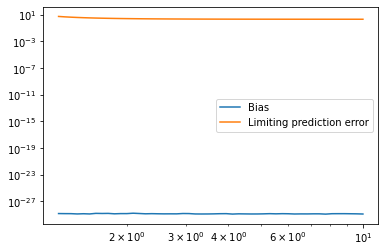

In [57]:
import matplotlib.pyplot as plt
plt.loglog(gammas, predErrs, label='Bias')
plt.loglog(gammas, limPredErr, label='Limiting prediction error')
plt.legend()
plt.show()

In [58]:
predErrs

[1.5500899380194817e-29,
 1.50992034712212e-29,
 1.4984720838834164e-29,
 1.3567715759214417e-29,
 1.460917772840996e-29,
 1.3574966577005322e-29,
 1.6531946686203228e-29,
 1.5914586803077668e-29,
 1.6319923257176233e-29,
 1.4225907468066722e-29,
 1.527228259438859e-29,
 1.524061256777653e-29,
 1.740764304948036e-29,
 1.5770419318938244e-29,
 1.427249627314484e-29,
 1.4963074039269872e-29,
 1.4369750926530067e-29,
 1.397258640270565e-29,
 1.4133072449626465e-29,
 1.3974162173007393e-29,
 1.5676865251167825e-29,
 1.5383428456850477e-29,
 1.3519088984722033e-29,
 1.3346906720486128e-29,
 1.3477521935615174e-29,
 1.3971836033462865e-29,
 1.4764398076351974e-29,
 1.5000655908714703e-29,
 1.2960240555140657e-29,
 1.4124156965949039e-29,
 1.373492878602759e-29,
 1.3402531505123876e-29,
 1.347961747030436e-29,
 1.4026040695141046e-29,
 1.493666896082487e-29,
 1.4117909919523344e-29,
 1.489600264047094e-29,
 1.4478863193545144e-29,
 1.3333823434507237e-29,
 1.379852232623894e-29,
 1.3665693380